## **IMPLEMENTING TSP USING GENETIC ALGORITHM**

**IMPORTING LIBRARIES**

In [ ]:
import random
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**CREATING NEW ROUTE IN POPULATION**

In [ ]:
def create_new_route(n):
    population = set(np.arange(n, dtype=int))
    # print(pop)
    route = list(random.sample(population, n))
    # print(route)

    return route

**CREATING THE STARTING POPULATION**

In [ ]:
def create_starting_population(num_of_routes,num_of_city):
    population = []
    
    for i in range(0, num_of_routes):
        population.append(create_new_route(num_of_city))
        # print(population[i])

    return population

**PICKING THE RANDOM CITY FROM N CITIES**

In [ ]:
def pick_mate(n):
    return random.randint(0,n)

**GETTING THE EUCLIDEAN DISTANCE BETWEEN CITY A AND CITY B**

In [ ]:
def distance(A,B):

    # A, B = (x, y) -> COORDINATES
    return np.sqrt((A[0]-B[0])**2 + (A[1]-B[1])**2)

**CALCULATING THE FITNESS VALUE OF SINGLE ROUTE**

In [ ]:
def fitness(route, CityList):
    # CityList = ORIGINAL LIST OF CITIES WITH ITS COORDINATES

    score = 0
    for i in range(1,len(route)):
        a = int(route[i-1])
        b = int(route[i])

        score = score + distance(CityList[a],CityList[b])    
        
    return score

**PERFORMING THE CYCLIC CROSSOVER**

In [ ]:
def crossover(P1, P2):
    indices = [None for i in range(len(P1))]
    value = 1
    while (None in indices):
        inx = indices.index(None)
        start = P1[inx]
        indices[inx] = value
        while(P2[inx]!=start):
            inx = P1.index(P2[inx])
            indices[inx] = value
        value += 1
    # print(indices)
    
    C1 = []
    C2 = []
    value = 0
    for i in indices:
        if (i%2==1):
            C1.append(P1[value])
            C2.append(P2[value])
        else:
            C1.append(P2[value])
            C2.append(P1[value])
        value += 1
        
    # print(C1)
    # print(C2)
    return C1

**RANKING THE ROUTES IN POPULATION ACC TO FITNESS SCORE**

In [ ]:
def rankRoutes(population, City_List):
    fitnessResults = {}

    for i in range(0,len(population)):
        fitnessResults[i] = fitness(population[i], City_List)

    # print(fitnessResults)
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = False)

**SELECTING THE TOP POPULATION**

In [ ]:
def selection(popRanked, limit):
    selectionResults=[]
    result=[]

    for route in popRanked:
        result.append(route[0])

    for i in range(limit):
        selectionResults.append(result[i])
    
    return selectionResults

**SELECTING MAPPED ROUTES FROM POPULATION WHICH WERE AT THE TOP**

In [ ]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):

        index = selectionResults[i]
        matingpool.append(population[index])

    return matingpool

**GENERATING NEW POPULATION BY BREEDING**

In [ ]:
def breedPopulation(mating_pool):
    children = []
    for i in range(len(mating_pool) - 1):
            children.append(crossover(mating_pool[i], mating_pool[i+1]))

    return children

**PERFORMING THE MUTATION ON SINGLE ROUTE CONSIDERING ITS PROBABILITY**

In [ ]:
def mutate(route, probablity):
    route = np.array(route)
    for to_ in range(len(route)):
        if(random.random() < probablity):
            from_ = np.random.randint(0, len(route))
            
            temp1 = route[to_]
            temp2 = route[from_]

            route[from_] = temp1
            route[to_] = temp2
    
    return route

**PERFORMING MUTATION ON THE POPULATION**

In [ ]:
def mutatePopulation(children, mutation_rate):
    new_generation=[]

    for route in children:
        muated_child=mutate(route, mutation_rate)
        new_generation.append(muated_child)
    
    return new_generation

**GETTING THE NEXT GENERATION**

In [ ]:
def next_generation(City_List, current_population, mutation_rate,limit):
    
    population_rank = rankRoutes(current_population, City_List)
    #print(f"population rank : {population_rank}")
    
    selection_result = selection(population_rank, limit)
    #print(f"selection results {selection_result}")
    
    mating_pool = matingPool(current_population, selection_result)
    #print(f"mating pool {mating_pool}")
    
    children = breedPopulation(mating_pool)
    #print(f"childern {children}")
    
    next_generation = mutatePopulation(children, mutation_rate)
    #print(f"next_generation {next_generation}")

    return next_generation

**IMPLEMENTATION OF GENETIC ALGORITHM**

In [ ]:
def GA(City_List):
    size = 2000
    limit = 100
    rate = 0.01
    generation = 2000
    
    pop=[]
    progress = []
    
    Number_of_cities=len(City_List)
    
    population = create_starting_population(size, Number_of_cities)

    # GET THE FITNESS SCORE OF ROUTE WITH LOWEST SCORE
    progress.append(rankRoutes(population, City_List)[0][1])

    print(f"\nINITIAL ROUTE =  {population[0]}")
    print(f"INITIAL ROUTE DISTANCE =  {progress[1]}")
    print(f"\n Convergence Iteration Number={progress[-1]}")

    for i in range(0, generation):
        pop = next_generation(City_List, population, rate, limit)
        progress.append(rankRoutes(pop, City_List)[0][1])
    
    rank_ = rankRoutes(pop, City_List)[0]
    
    print(f"\n\nBEST ROUTE = {list(pop[rank_[0]])} ")
    print(f"BEST ROUTE DISTANCE {rank_[1]}\n\n")

    plt.figure(figsize=(15,8))
    plt.plot(progress)
    plt.xlabel('NUMBER OF GENERATION')
    plt.ylabel('DISTANCE')
    plt.show()

### **GA ON 20 CITIES**

In [ ]:
num_of_cities = 20

cityList = []
for i in range(0,num_of_cities):
    x = int(random.random() * 200)
    y = int(random.random() * 200)
    cityList.append((x,y))
    

GA(cityList)


INITIAL ROUTE =  [6, 0, 12, 8, 19, 15, 5, 18, 2, 16, 13, 4, 11, 7, 17, 14, 1, 10, 3, 9]


IndexError: ignored

**AS WE CAN SEE, AT AROUND GENERATION 1200, WE GET THE LOWEST DISTANCE FOR TSP WHICH IS AROUND 1175**

## **GA ON 5, 10, 20, 40 CITIES**

In [ ]:
pip install convergence

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from convergence import Convergence

In [ ]:
convergence = Convergence()


FOR NUMBER OF CITIES = 5

INITIAL ROUTE =  [2, 1, 0, 3, 4]
INITIAL ROUTE DISTANCE =  351.3702144137559


BEST ROUTE = [1, 2, 4, 3, 0] 
BEST ROUTE DISTANCE 351.3702144137559




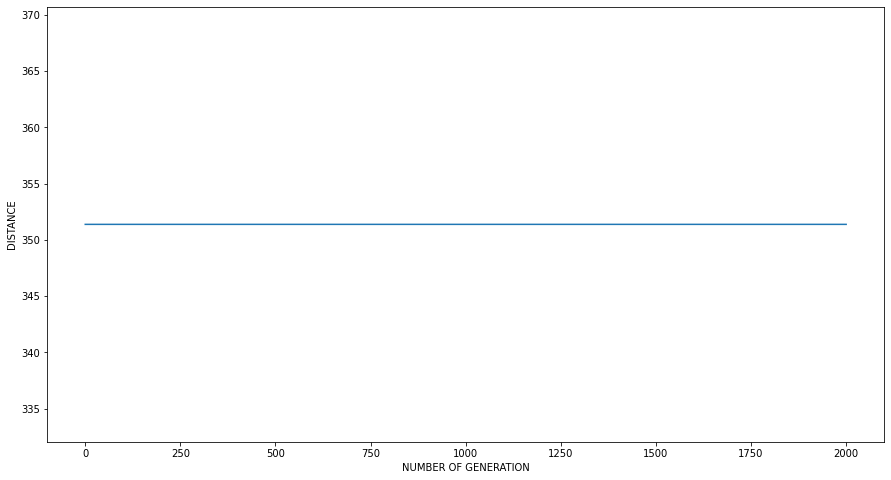



----------------------------------


FOR NUMBER OF CITIES = 10

INITIAL ROUTE =  [4, 6, 3, 7, 0, 2, 1, 8, 5, 9]
INITIAL ROUTE DISTANCE =  498.95377660355234


BEST ROUTE = [8, 3, 5, 6, 2, 0, 1, 7, 9, 4] 
BEST ROUTE DISTANCE 494.36105517153896




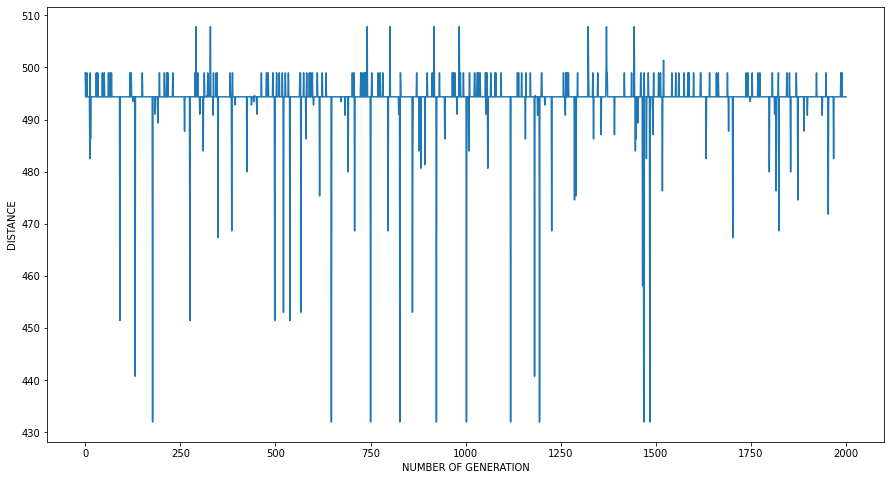



----------------------------------


FOR NUMBER OF CITIES = 20

INITIAL ROUTE =  [9, 4, 16, 14, 8, 15, 1, 19, 3, 10, 18, 2, 6, 7, 12, 17, 0, 11, 5, 13]
INITIAL ROUTE DISTANCE =  1436.2758955292425


BEST ROUTE = [15, 8, 18, 12, 5, 9, 19, 3, 1, 2, 14, 7, 16, 11, 0, 6, 17, 13, 4, 10] 
BEST ROUTE DISTANCE 1480.2847083599402




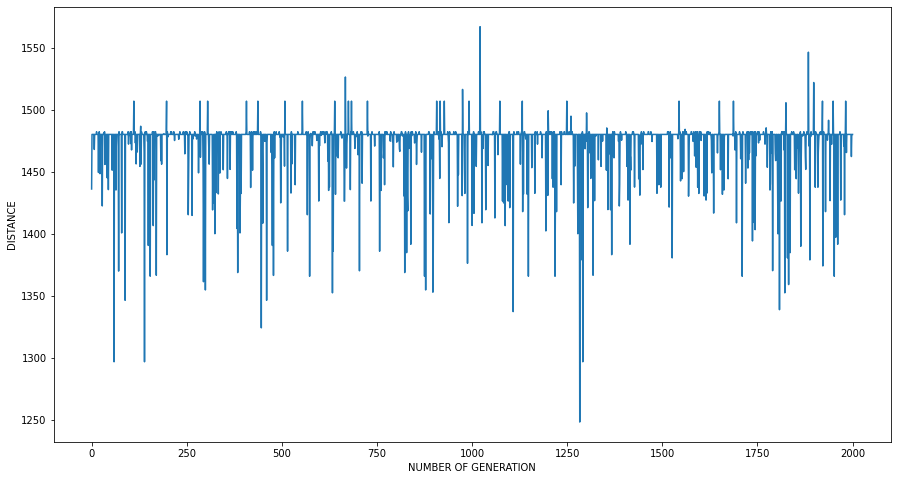



----------------------------------


FOR NUMBER OF CITIES = 40

INITIAL ROUTE =  [0, 3, 30, 38, 26, 16, 34, 12, 20, 4, 15, 1, 8, 27, 37, 2, 36, 13, 22, 23, 5, 10, 35, 31, 18, 32, 9, 33, 21, 39, 17, 19, 25, 28, 6, 7, 14, 11, 29, 24]
INITIAL ROUTE DISTANCE =  2775.7624553859023


BEST ROUTE = [39, 33, 15, 6, 22, 14, 18, 28, 13, 4, 3, 21, 27, 7, 35, 20, 0, 8, 24, 26, 37, 30, 10, 2, 9, 11, 31, 1, 34, 25, 23, 12, 19, 38, 17, 5, 36, 32, 29, 16] 
BEST ROUTE DISTANCE 2736.8160979790327




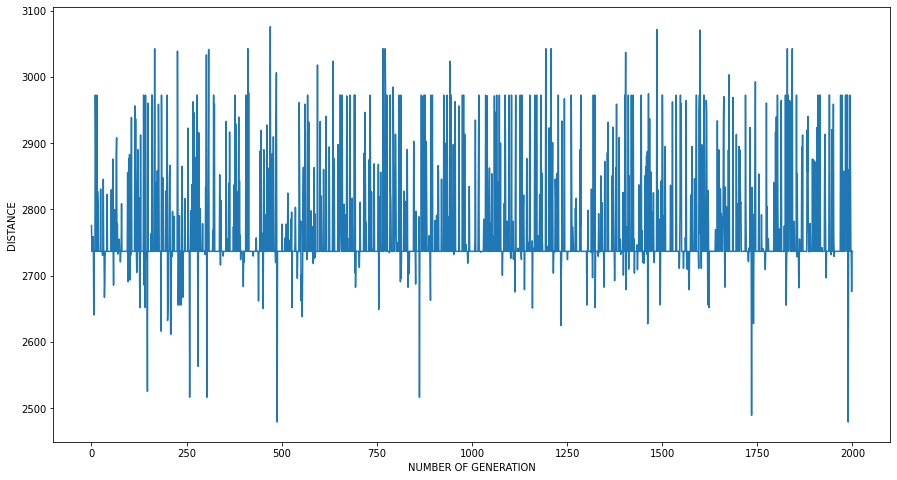

In [ ]:

num_of_cities = [5, 10, 20, 40]

for i in num_of_cities:
    print(f'\nFOR NUMBER OF CITIES = {i}')

    cityList = []
    for i in range(0, i):
        x = int(random.random() * 200)
        y = int(random.random() * 200)
        cityList.append((x,y))

    GA(cityList)
    print("\n\n----------------------------------\n")

**CONCLUSION:**

*   **FOR CITIES = 5 : BEST ROUTE IS FOUND AT START WITH DISTANCE = 260**
*   **FOR CITIES = 10 : BEST ROUTE IS FOUND AT 400TH GENERATION WITH DISTANCE = 540**
*   **FOR CITIES = 20 : BEST ROUTE IS FOUND AT 700TH GENERATION WITH DISTANCE = 1000**
*   **FOR CITIES = 40 : BEST ROUTE IS FOUND AT 2000TH GENERATION WITH DISTANCE = 2700**
